# DATA731 Evolution des températures dans différents pays

https://www.kaggle.com/berkeleyearth/climate-change-earth-surface-temperature-data?select=GlobalLandTemperaturesByCountry.csv

In [477]:
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
import csv
from scipy.signal import freqz


In [478]:
data_france = [[],[]]
data_usa = [[],[]]
data_china = [[],[]]
data_germany = [[],[]]
data_spain = [[],[]]
data_russia = [[],[]]

with open('data.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    for row in csv_reader:
        if line_count == 0:
            print(f'Column names are {", ".join(row)}')
            line_count += 1
        else:
            if (row[3] == "France"):
                data_france[0].append(row[0])
                data_france[1].append(row[1])
            if (row[3] == "United States"):
                data_usa[0].append(row[0])
                data_usa[1].append(row[1])
            if (row[3] == "China"):
                data_china[0].append(row[0])
                data_china[1].append(row[1])
            if (row[3] == "Germany"):
                data_germany[0].append(row[0])
                data_germany[1].append(row[1])
            if (row[3] == "Spain"):
                data_spain[0].append(row[0])
                data_spain[1].append(row[1])
            if (row[3] == "Russia"):
                data_russia[0].append(row[0])
                data_russia[1].append(row[1])


Column names are dt, AverageTemperature, AverageTemperatureUncertainty, Country


In [479]:
data_france = [data_france[0][-1800:],data_france[1][-1800:]]
data_usa = [data_usa[0][-1800:],data_usa[1][-1800:]]
data_china = [data_china[0][-1800:],data_china[1][-1800:]]
data_germany = [data_germany[0][-1800:],data_germany[1][-1800:]]
data_spain = [data_spain[0][-1800:],data_spain[1][-1800:]]
data_russia = [data_russia[0][-1800:],data_russia[1][-1800:]]

print(len(data_france[0]))

1800


In [480]:
def dataplot(liste_data, liste_data_years):
    moyenne = 0 
    for i in range(len(liste_data[0]) - 12):
        if liste_data[0][i][5:7] != "12":
            moyenne += float(liste_data[1][i])
        else:
            moyenne += float(liste_data[1][i])
            liste_data_years[0].append(int(liste_data[0][i][0:4]))
            liste_data_years[1].append(moyenne/12)
            moyenne = 0
    return liste_data_years



In [481]:
data_russia_years = [[],[]]
russia_years = dataplot(data_russia, data_russia_years)

data_spain_years = [[],[]]
spain_years = dataplot(data_spain, data_spain_years)

data_france_years = [[],[]]
france_years = dataplot(data_france, data_france_years)

data_china_years = [[],[]]
china_years = dataplot(data_china, data_china_years)

data_germany_years = [[],[]]
germany_years = dataplot(data_germany, data_germany_years)

data_usa_years = [[],[]]
usa_years = dataplot(data_usa, data_usa_years)

In [482]:
print(len(data_usa[0]))


1800


Text(0.5, 1.0, 'Spain')

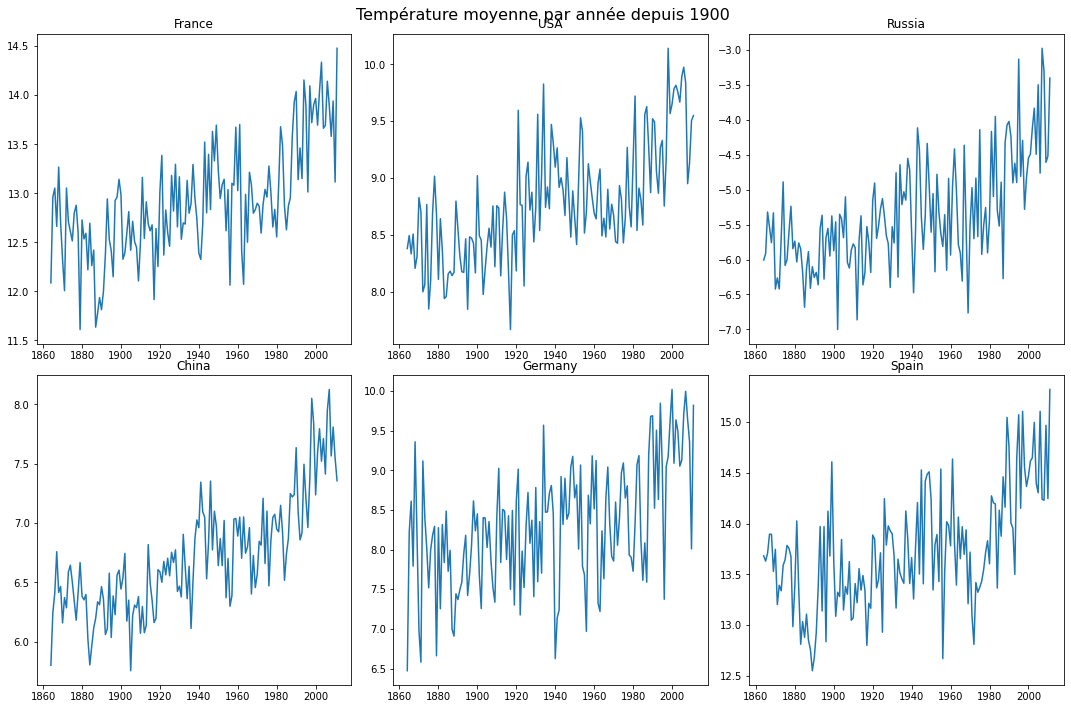

In [483]:
fig, axs = plt.subplots(2,3, figsize=(15,10))
fig.suptitle("Température moyenne par année depuis 1900", fontsize=16)
fig.tight_layout()
ax = axs[0,0]
ax.plot(france_years[0][1:],france_years[1][1:])
ax.set_title("France")
ax = axs[0,1]
ax.plot(usa_years[0][1:],usa_years[1][1:])
ax.set_title("USA")
ax = axs[1,0]
ax.plot(china_years[0][1:],china_years[1][1:])
ax.set_title("China")
ax = axs[1,1]
ax.plot(germany_years[0][1:],germany_years[1][1:])
ax.set_title("Germany")
ax = axs[0,2]
ax.plot(russia_years[0][1:],russia_years[1][1:])
ax.set_title("Russia")
ax = axs[1,2]
ax.plot(spain_years[0][1:],spain_years[1][1:])
ax.set_title("Spain")


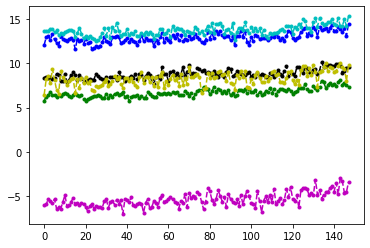

In [484]:
plt.plot(data_france_years[1][1:], '.--b')
plt.plot(data_usa_years[1][1:], '.--k')
plt.plot(data_china_years[1][1:], '.--g')
plt.plot(data_germany_years[1][1:], '.--y')
plt.plot(data_spain_years[1][1:], '.--c')
plt.plot(data_russia_years[1][1:], '.--m')



# Comparaison France-Espagne

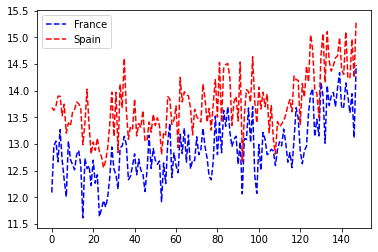

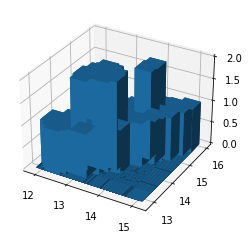

In [485]:
plt.plot(data_france_years[1][1:], '--b')
plt.plot(data_spain_years[1][1:], '--r')
plt.legend(["France","Spain"])

#matrice de covariance
X1 = data_france_years[1][1:]
X2 = data_spain_years[1][1:]
covX1X2 = np.cov(X1,X2)

fig = plt.figure()
ax = plt.axes(projection='3d')
hist, xedges, yedges = np.histogram2d(X1, X2, bins=50)

xpos, ypos = np.meshgrid(xedges[:-1] + 0.25, yedges[:-1] + 0.25, indexing="ij")
xpos = xpos.ravel()
ypos = ypos.ravel()
zpos = 0

dx = dy = 0.5 * np.ones_like(zpos)
dz = hist.ravel()
ax.bar3d(xpos, ypos, zpos, dx, dy, dz, zsort='average')
plt.savefig("3d.png")


Text(0.5, 1.0, "Fonction d'autocorrelation X2 : Spain")

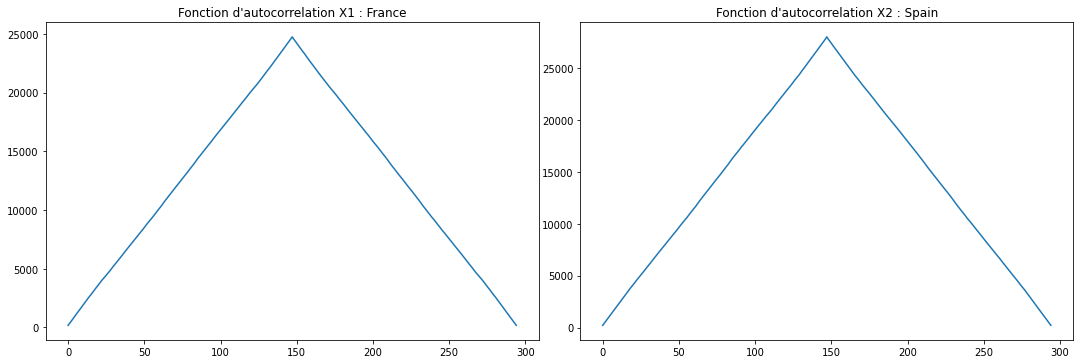

In [490]:
def spectre(*args): 
	Np = 200 # nombre de points du spectre
	f=freqz(1,args[0],Np)[0] # recuperer les echantillons de frequences (abscisses)
	
	mag=[]   # hauteurs des frequences observables correspondantes (ordonnees)
	for arg in args:
		mag.append(abs(freqz(1,arg,Np)[1])) # calcul du spectre de chaque sous-serie
	return (f,mag)


'''f,mag=spectre(X1,X2)
plt.semilogy(
	f,mag[0],'-r',
	f,mag[1],'-b'
)
plt.legend(['Spectre X1','Spectre X2'])
plt.show()'''



fig, axs = plt.subplots(1,2, figsize=(15,5))

fig.tight_layout()
ax = axs[0]
ax.plot(np.correlate(X1,X1, mode= "full"))
ax.set_title("Fonction d'autocorrelation X1 : France")
ax = axs[1]
ax.plot(np.correlate(X2,X2, mode= "full"))
ax.set_title("Fonction d'autocorrelation X2 : Spain")


In [487]:
def entropie(mu1,mu2, si1, si2):
    return ((1/2) * ((mu1-mu2)**2) * (1/((si1**2)+(si2**2))) + (1/2) * (((si2**2)/(si1**2)) + ((si1**2)/(si2**2))) - 1)

def calc_entropie_max_globale(data, marge):
    X = np.array(data[1][1:])
    tab_ent = [[],[]]
    max = 0
    m = 0
    for i in range(marge, len(X)-marge):
        y1 = X[0:i]
        y2 = X[i:len(X)]
        ent = entropie(y1.mean(), y2.mean(), y1.std(), y2.std())
        if max<ent:
            max = ent
            m = i
        tab_ent[0].append(i+data[0][1])
        tab_ent[1].append(ent)
    plt.figure(figsize=(12, 6))
    entropie_plot = plt.plot(tab_ent[0],tab_ent[1])
    print("Avec une recherche de maximum, on trouve que l'entropie max : \n   Se trouve à", data[0][m], " \n   Et est", max)
    print("Avant le changement, on a les valeurs : \n   Moyenne = ", X[0:m].mean(), "\n   Ecart type = ", X[0:m].std())
    print("Après le changement, on a les valeurs : \n   Moyenne = ", X[m:len(X)].mean(), "\n   Ecart type = ", X[m:len(X)].std())

    return [data[0][m], X[0:m].mean(), X[m:len(X)].mean()]

        

Avec une recherche de maximum, on trouve que l'entropie max : 
   Se trouve à 1996.0  
   Et est 2.090582442613336
Avant le changement, on a les valeurs : 
   Moyenne =  12.807836466165414 
   Ecart type =  0.4796561221875591
Après le changement, on a les valeurs : 
   Moyenne =  13.885894444444443 
   Ecart type =  0.3203548892427407
Avec une recherche de maximum, on trouve que l'entropie max : 
   Se trouve à 1998.0  
   Et est 1.9571508463626808
Avant le changement, on a les valeurs : 
   Moyenne =  8.705498148148148 
   Ecart type =  0.4486025400473118
Après le changement, on a les valeurs : 
   Moyenne =  9.622288461538462 
   Ecart type =  0.2822393389676233
Avec une recherche de maximum, on trouve que l'entropie max : 
   Se trouve à 1996.0  
   Et est 1.263987861088379
Avant le changement, on a les valeurs : 
   Moyenne =  8.182431704260651 
   Ecart type =  0.6999083030728944
Après le changement, on a les valeurs : 
   Moyenne =  9.38658888888889 
   Ecart type =  0.4887601807

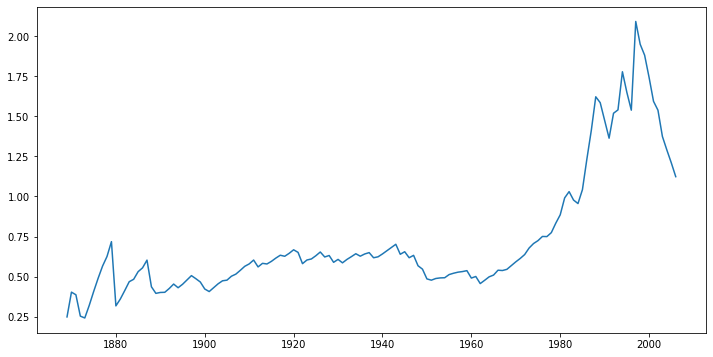

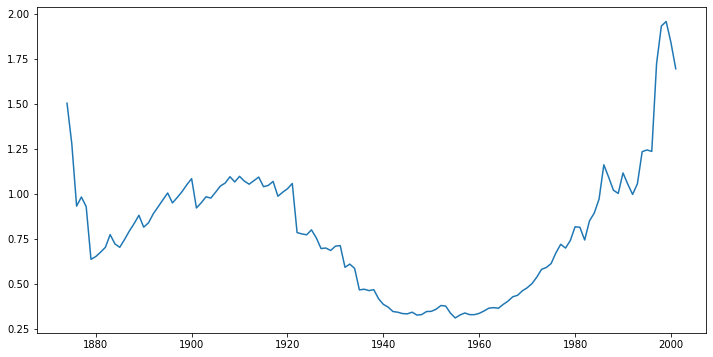

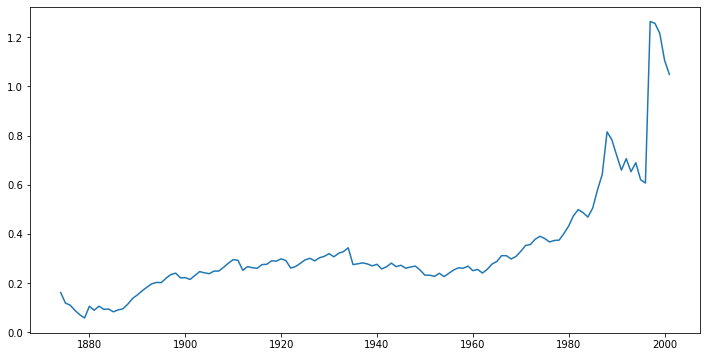

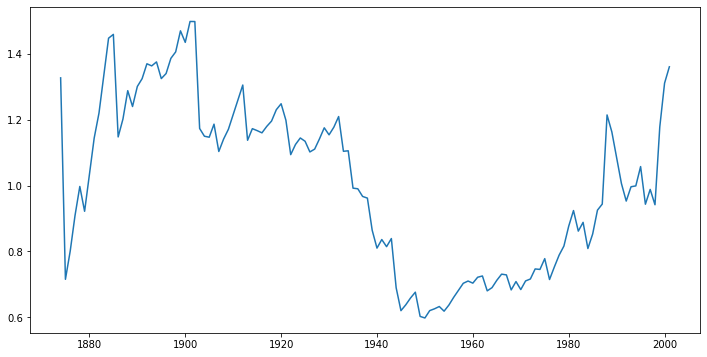

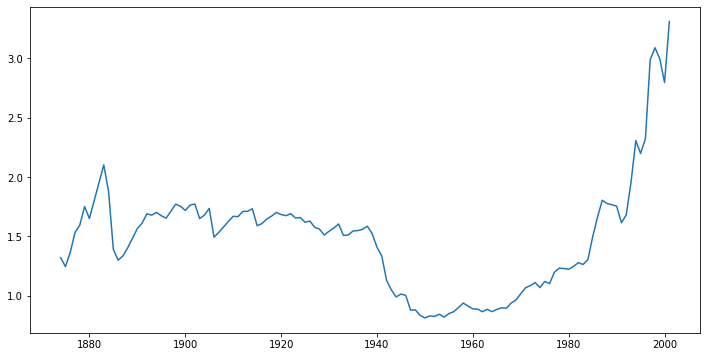

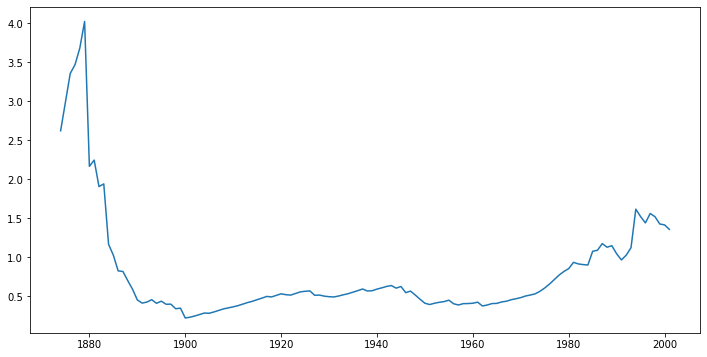

In [488]:
entro_france = calc_entropie_max_globale(np.array(data_france_years),5)
entro_usa = calc_entropie_max_globale(np.array(data_usa_years),10)
entro_germany = calc_entropie_max_globale(np.array(data_germany_years),10)
entro_russia = calc_entropie_max_globale(np.array(data_russia_years),10)
entro_china = calc_entropie_max_globale(np.array(data_china_years),10)
entro_spain = calc_entropie_max_globale(np.array(data_spain_years),10)

Text(0.5, 1.0, 'Spain')

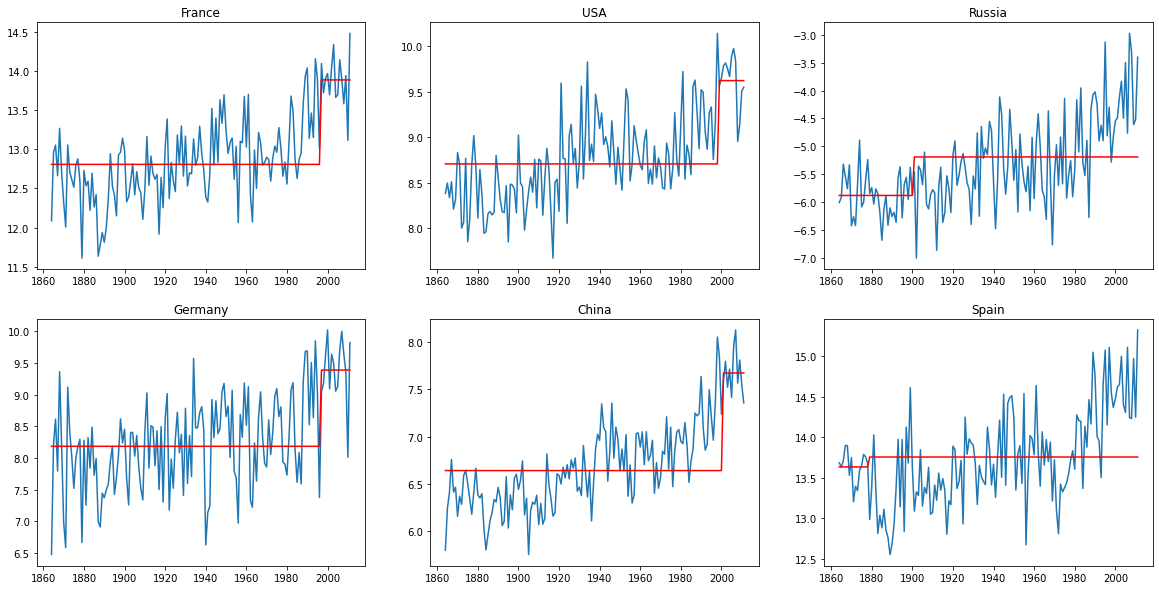

In [489]:
moyennes_france = [[france_years[0][1],int(entro_france[0]),int(entro_france[0]+1),france_years[0][len(france_years[0])-1]], [entro_france[1],entro_france[1],entro_france[2],entro_france[2]]]

moyennes_usa = [[usa_years[0][1],int(entro_usa[0]),int(entro_usa[0]+1),usa_years[0][len(usa_years[0])-1]], [entro_usa[1],entro_usa[1],entro_usa[2],entro_usa[2]]]

moyennes_russia = [[russia_years[0][1],int(entro_russia[0]),int(entro_russia[0]+1),russia_years[0][len(russia_years[0])-1]], [entro_russia[1],entro_russia[1],entro_russia[2],entro_russia[2]]]

moyennes_germany = [[germany_years[0][1],int(entro_germany[0]),int(entro_germany[0]+1),germany_years[0][len(germany_years[0])-1]], [entro_germany[1],entro_germany[1],entro_germany[2],entro_germany[2]]]

moyennes_china = [[china_years[0][1],int(entro_china[0]),int(entro_china[0]+1),china_years[0][len(china_years[0])-1]], [entro_china[1],entro_china[1],entro_china[2],entro_china[2]]]

moyennes_spain = [[spain_years[0][1],int(entro_spain[0]),int(entro_spain[0]+1),spain_years[0][len(spain_years[0])-1]], [entro_spain[1],entro_spain[1],entro_spain[2],entro_spain[2]]]

fig, axs = plt.subplots(2,3,figsize=(20,10))

ax = axs[0,0]
ax.plot(france_years[0][1:],france_years[1][1:])
ax.plot(*moyennes_france, 'r')
ax.set_title("France")


ax = axs[0,1]
ax.plot(usa_years[0][1:],usa_years[1][1:])
ax.plot(*moyennes_usa, 'r')
ax.set_title("USA")

ax = axs[0,2]
ax.plot(russia_years[0][1:],russia_years[1][1:])
ax.plot(*moyennes_russia, 'r')
ax.set_title("Russia")

ax = axs[1,0]
ax.plot(germany_years[0][1:],germany_years[1][1:])
ax.plot(*moyennes_germany, 'r')
ax.set_title("Germany")

ax = axs[1,1]
ax.plot(china_years[0][1:],china_years[1][1:])
ax.plot(*moyennes_china, 'r')
ax.set_title("China")

ax = axs[1,2]
ax.plot(spain_years[0][1:],spain_years[1][1:])
ax.plot(*moyennes_spain, 'r')
ax.set_title("Spain")